# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [18]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [43]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 
        'Age', 'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']]

X.shape

(768, 9)

In [44]:
y = df['Outcome']
y.shape

(768,)

In [45]:
# 사이킷런에서 제공하는 model_selection의 train_test_split으로 만든다
# 매번 샘플링할 때마다 데이터가 달라질 수 있으므로 random_state=42 로 설정해준다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [48]:
# train 세트의 문제와 정답의 데이터 수 확인
X_train.shape, y_train.shape

((614, 9), (614,))

In [49]:
# test 세트의 문제와 정답의 데이터 수 확인
X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기
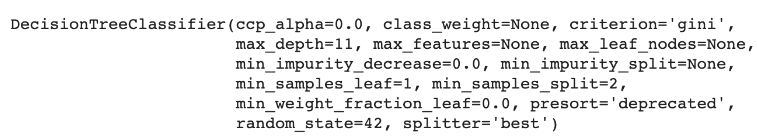
- DecisionTree의 파라미터를 어떻게 조절하느냐에 따라서도 모델의 성능이 달라진다!
- max_depth을 조정하는 것만으로도 성능 올릴 수도 있다! 너무 나무 깊이가 얕으면 언더피팅이 될 수 있다.
- min_samples_leaf=1: 가장 마지막 노드가 1개일 때. 개수가 너무 적으면 오버피팅이 되기 쉽다
- min_samples_split=2: 2개 나눌 수 있을 때 나눈다

In [99]:
# DecisionTree 불러오기
# 당뇨병 여부를 맞추는 것이기 때문에 분류 모델로
# max_depth 값에 따라 다르게 머신이 작동한다

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

## 최적의 max_depth 값 찾기

In [98]:
# 반복문 돌려서 max_depth 값 설정해주고 머신러닝 돌려서 정확도까지 계산하기
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


# GridSearch
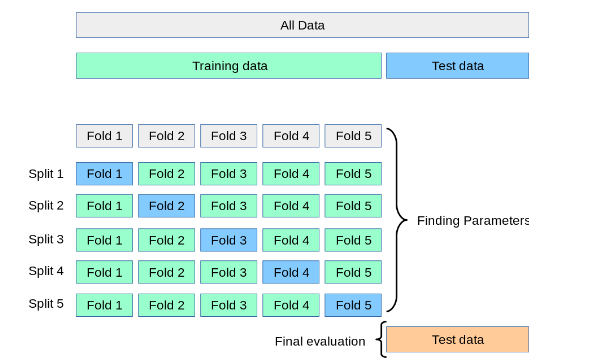
- cross validation(사진): train 데이터 셋을 여러 fold로 나눠서 평균을 내는 방법
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
- GridSearch: 모델에게 가장 적합한 하이퍼 파라미터(모델을 생성할 때, 사용자가 직접 설정하는 변수)를 찾기
- cf) 파라미터: 학습 과정에서 생성되는 변수, 학생에서 축적되는 학습 내용 (≠ 하이퍼 파라미터)
- 그리드 서치를 하는 이유는 "가장 우수한 성능을 보이는 모델의 하이퍼 파라미터를 찾기 위해서"
- 시간이 오래 걸린다, 우리가 지정한 범위 안에서만 하이퍼 파라미터를 찾을 수 있다.

In [101]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth":range(3,12), "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

# param_grid: 튜닝하고 싶은 파라미터 정보 넣기
# max_features: 일부 feature만 사용하고 싶을 때 사용. 1은 전체라는 뜻
# n_jobs=-1: -1로 설정하여 사용 가능한 모든 장비를 학습에 이용
# cv=5: cross validation을 5개로 나눈다
# verbose=1: 1로 하여 로그를 찍으면서 학습. 0이면 로그를 출력하지 않는다. 

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

결과
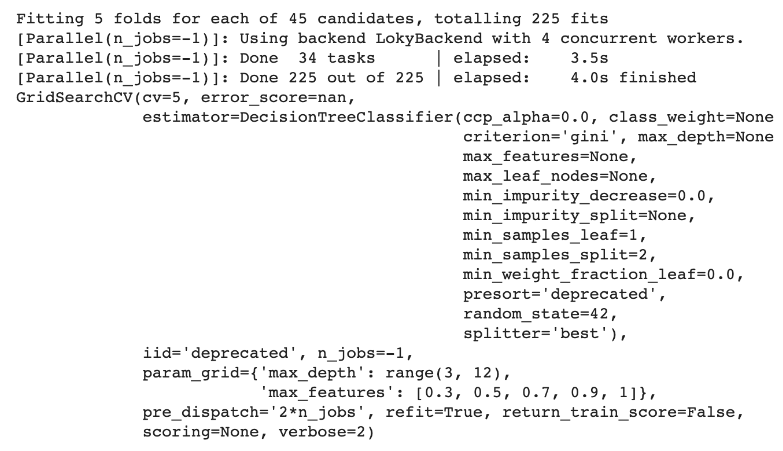

In [102]:
# 가장 성능이 좋은 파라미터
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [103]:
# 가장 좋은 성능을 내는 파라미터 조합 전체 알려주기
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [104]:
# 가장 좋은 점수
clf.best_score_

0.8664934026389444

In [109]:
# cv_results_는 cross validation 결과를 데이터프레임으로 반환, score 내림차순 정렬
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.010451,0.002051,0.005222,0.000881,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.007468,0.001163,0.004107,0.000899,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.008333,0.000408,0.004498,0.000440,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.011155,0.002885,0.005045,0.000867,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.012397,0.003522,0.004612,0.000365,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [110]:
# 예측 진행하여 답안지 만들기
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [111]:
# test에서는 기존 점수보다 더 좋게 나왔다(0.866)
clf.score(X_test, y_test)

0.8701298701298701

# RandomSearch
- GridSearch는 우리가 설정한 범위 안에서만 파라미터를 탐색하지만, RandomSearch는 좋은 성능을 낼 수 있는 랜덤값을 탐색한다.

In [149]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([11, 11,  4, 13, 10, 11,  9,  5,  8,  9])

In [150]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.82053003, 0.93262626, 0.93016221, 0.77088722, 0.83958657,
       0.77927546, 0.79025708, 0.74305278, 0.82006082, 0.7973615 ,
       0.7077742 , 0.75912408, 0.72764975, 0.89420385, 0.86631631,
       0.83842873, 0.70499287, 0.99743938, 0.98732571, 0.90824784,
       0.8720706 , 0.71137467, 0.97326501, 0.70238357, 0.91152221,
       0.93771761, 0.95126655, 0.7421287 , 0.70126771, 0.98048838,
       0.84192509, 0.76880489, 0.71808312, 0.72937484, 0.84026909,
       0.93035832, 0.88976894, 0.87649313, 0.79724506, 0.75583192,
       0.9805821 , 0.7730493 , 0.85138599, 0.77628354, 0.7494957 ,
       0.98476694, 0.90075446, 0.78312634, 0.79383551, 0.89210533,
       0.80878364, 0.86293133, 0.74920634, 0.91683231, 0.97354815,
       0.98325822, 0.9019061 , 0.71704373, 0.95565311, 0.83890009,
       0.9443388 , 0.80347687, 0.83213366, 0.83051142, 0.89554489,
       0.97937114, 0.73207607, 0.91951151, 0.90684298, 0.84892234,
       0.76165759, 0.96549796, 0.90869512, 0.91889483, 0.86182

In [112]:
model

DecisionTreeClassifier(random_state=42)

In [151]:
# param_distributions을 정의하여 랜덤한 값 넣기
# random_state는 값을 고정하는 역할
# 가장 좋은 파라미터 찾게 된다
param_distributions = {"max_depth" :max_depth, "max_features":max_features, "min_samples_split":list(range(2, 7))}
param_distributions

{'max_depth': array([11, 11,  4, 13, 10, 11,  9,  5,  8,  9]),
 'max_features': array([0.82053003, 0.93262626, 0.93016221, 0.77088722, 0.83958657,
        0.77927546, 0.79025708, 0.74305278, 0.82006082, 0.7973615 ,
        0.7077742 , 0.75912408, 0.72764975, 0.89420385, 0.86631631,
        0.83842873, 0.70499287, 0.99743938, 0.98732571, 0.90824784,
        0.8720706 , 0.71137467, 0.97326501, 0.70238357, 0.91152221,
        0.93771761, 0.95126655, 0.7421287 , 0.70126771, 0.98048838,
        0.84192509, 0.76880489, 0.71808312, 0.72937484, 0.84026909,
        0.93035832, 0.88976894, 0.87649313, 0.79724506, 0.75583192,
        0.9805821 , 0.7730493 , 0.85138599, 0.77628354, 0.7494957 ,
        0.98476694, 0.90075446, 0.78312634, 0.79383551, 0.89210533,
        0.80878364, 0.86293133, 0.74920634, 0.91683231, 0.97354815,
        0.98325822, 0.9019061 , 0.71704373, 0.95565311, 0.83890009,
        0.9443388 , 0.80347687, 0.83213366, 0.83051142, 0.89554489,
        0.97937114, 0.73207607, 0.919

In [162]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, param_distributions, n_iter=100, scoring="accuracy", n_jobs=-1, cv=5, random_state=42)
clf.fit(X_train, y_train)

# random_state는 값을 보정만 해주는 것이기 때문에 값의 높고 낮음은 머신러닝 성능고 상관이 없다
# 단지 값을 고정시켜주는 역할!
# n_iter=10: 10번을 돌변서 randomsearchCV 실행하겠다

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([11, 11,  4, 13, 10, 11,  9,  5,  8,  9]),
                                        'max_features': array([0.82053003, 0.93262626, 0.93016221, 0.77088722, 0.83958657,
       0.77927546, 0.79025708, 0.74305278, 0.82006082, 0.7973615 ,
       0.7077742 , 0.75912408, 0.72764975, 0.89420385, 0.86631631,
       0.8...
       0.76165759, 0.96549796, 0.90869512, 0.91889483, 0.86182906,
       0.9352316 , 0.78864393, 0.95102842, 0.87590656, 0.87171222,
       0.99324147, 0.80380475, 0.86310354, 0.95951129, 0.79322607,
       0.81481592, 0.73016412, 0.86344357, 0.98866401, 0.80915368,
       0.91124997, 0.75275797, 0.7579718 , 0.94872933, 0.75708807,
       0.93863679, 0.82469648, 0.7557252 , 0.86831857, 0.82837765]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [163]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.8897689353780511, 'max_depth': 9}

In [164]:
# Grid보다 점수가 약간 오른 것을 볼 수 있다.
clf.best_score_

0.8713847794215648

In [165]:
clf.score(X_test, y_test)

0.8181818181818182

In [161]:
# 더 좋은 스코어를 찾기 위해 범위를 조정해보는 것이 중요하다
# Grid Search보다 더 많은 값을 랜덤하게 학습시킬 수 있다.
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
312,0.010757,0.001419,0.006137,0.002053,4,0.832134,10,"{'min_samples_split': 4, 'max_features': 0.832...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
469,0.010148,0.001207,0.004519,0.001054,6,0.930358,9,"{'min_samples_split': 6, 'max_features': 0.930...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
750,0.012262,0.005279,0.005929,0.001175,4,0.848922,10,"{'min_samples_split': 4, 'max_features': 0.848...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
763,0.011759,0.002197,0.006654,0.001827,6,0.916832,9,"{'min_samples_split': 6, 'max_features': 0.916...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
901,0.013355,0.005519,0.006447,0.001560,6,0.935232,9,"{'min_samples_split': 6, 'max_features': 0.935...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1


# 학습과 예측하기

In [93]:
# 학습시키기
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [94]:
feature_names = X_train.columns.tolist()

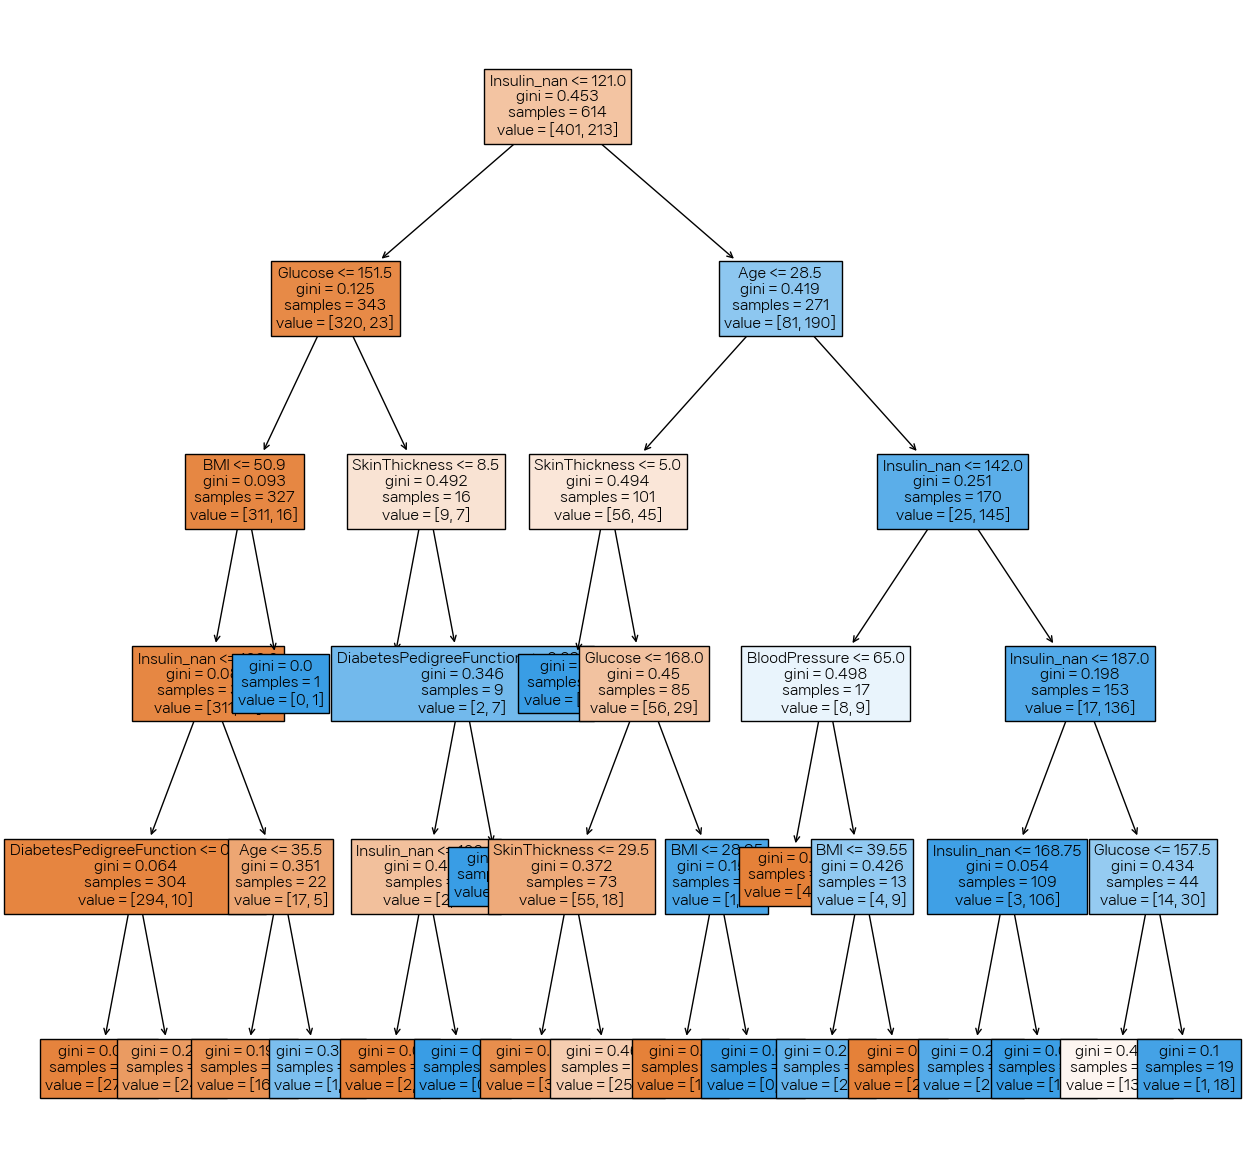

In [95]:
# 모델 시각화
from sklearn.tree import plot_tree 

plt.figure(figsize=(15,15))
tree = plot_tree(model, fontsize=10, feature_names=feature_names, filled=True)

In [96]:
# 예측을 하고 결과를 y_predict에 담는다
# 이때 y_test는 넣지 않는다. 왜냐하면 실전에서는 답지가 없기 때문이지! 우리가 풀어야 해!
# 0이면 당뇨병 발병하지 않고, 1이면 발병한다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

# 정확도 측정하기

In [97]:
# 다르게 예측한 개수 구하기
# 예측값 - 정답값
# 이 값을 그냥 더하면 소용없으니, 절대값 씌운 후 모두 더해준다

abs(y_predict - y_test).sum()


# 지난 실습과 개수가 다른 이유?
# 지난 실습에서 예측한 것과 다르게 성능이 더 안 좋게 나왔다 -> 데이터를 랜덤하게 섞었으므로 지난 번보다 더 많이 틀렸다 볼 수 있다.
# 그리고 DecisionTree 계속 반복해서 실행할수록 점점 값이 늘어난다...? -> 예측할 때마다 결정나무가 다른 나무를 그리게 됨..
# 저번 실습에서는 같은 값이 나왔는데? -> 그땐 random_state를 결정나무에도 적용해줬기 때문이다
# 그럼 결정나무에도 random_state를 정해줘보자 -> 계속 돌려 보면 변하지 않고 그대로다
# max_detph를 15로 변경해주었을 때 개수 차이가 28개 나왔다(더 늘어남). 왜냐하면 머신이 더 깊게까지 공부하느라 오버피팅된 것이다

22

In [85]:
# accuracy score 

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

85.71428571428571

# 부록
- 왜 train_test_split에서 random_state는 42일까?: https://eehoeskrap.tistory.com/621
- 그리드 서치: https://huidea.tistory.com/32